## Import essential library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, recall_score, roc_auc_score

from xgboost import XGBClassifier


## EDA

In [2]:
df = pd.read_csv('data/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
## find missing value

df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [5]:
## view dataset distribution

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [6]:
## view target value distribution

df.value_counts('HeartDisease')

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [7]:
## feature importance

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
cat_col = df.select_dtypes(include=['object']).columns
num_col = df.select_dtypes(exclude=['object']).columns

In [9]:
cat_col, num_col

(Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object'),
 Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
        'HeartDisease'],
       dtype='object'))

In [10]:
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [11]:
X[:3]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up


In [12]:
oe = OrdinalEncoder()

In [13]:
X[cat_col] = oe.fit_transform(X[cat_col])

In [14]:
X[:5]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1.0,1.0,140,289,0,1.0,172,0.0,0.0,2.0
1,49,0.0,2.0,160,180,0,1.0,156,0.0,1.0,1.0
2,37,1.0,1.0,130,283,0,2.0,98,0.0,0.0,2.0
3,48,0.0,0.0,138,214,0,1.0,108,1.0,1.5,1.0
4,54,1.0,2.0,150,195,0,1.0,122,0.0,0.0,2.0


In [15]:
mi_score = mutual_info_classif(X, y)

In [16]:
feature_importance_df = pd.DataFrame(
    {
        'feature': X.columns,
        'score': mi_score
    }
)

feature_importance_df = feature_importance_df.sort_values('score', ascending=False)
feature_importance_df

,feature,score
10,ST_Slope,0.206831
2,ChestPainType,0.142924
8,ExerciseAngina,0.121241
9,Oldpeak,0.113775
7,MaxHR,0.098323
4,Cholesterol,0.070086
1,Sex,0.057422
5,FastingBS,0.052156
0,Age,0.038381
3,RestingBP,0.025792


**So top 5 features** that influence our target variable are:

- ST_Slope
- ChestPainType
- ExerciseAngina
- Oldpeak
- MaxHR


I will use these features to train the model to predict the output

## Preprocessing

In [17]:
important_feature = feature_importance_df['feature'][:5]
important_feature = important_feature.tolist()
important_feature

['ST_Slope', 'ChestPainType', 'ExerciseAngina', 'Oldpeak', 'MaxHR']

In [18]:
X = X[important_feature]

In [19]:
X.head()

,ST_Slope,ChestPainType,ExerciseAngina,Oldpeak,MaxHR
0,2.0,1.0,0.0,0.0,172
1,1.0,2.0,0.0,1.0,156
2,2.0,1.0,0.0,0.0,98
3,1.0,0.0,1.0,1.5,108
4,2.0,2.0,0.0,0.0,122


In [20]:
X_full_train, X_test, y_full_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_full_train, y_full_train, test_size=0.25, random_state=42)

## Model Training + Hyperparameter tuning

### Logistic regression

In [21]:
scores = []
for C in [0.01, 0.1, 1, 10, 100]:
    
    lr = LogisticRegression(C=C)
    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_val)
    y_pred_proba = lr.predict_proba(X_val)[:,1]
    auc = roc_auc_score(y_val, y_pred_proba)
    recall = recall_score(y_val, y_pred)

    scores.append((C, auc, recall))

In [22]:
lr_score_df = pd.DataFrame(scores, columns=['C', 'AUC', 'Recall'])
lr_score_df.sort_values('Recall', ascending=False)

,C,AUC,Recall
1,0.10,0.934144,0.905660
3,10.00,0.936563,0.905660
2,1.00,0.936442,0.905660
4,100.00,0.936563,0.905660
0,0.01,0.914066,0.877358


#### Logistic regression result

`C = 0.1` -> seem to get the best score for Logitic Regression

### Random Forest

In [23]:
scores = []

for d in [1, 2, 3, 4, 5, 6, 10, 15, 20, None]:
    for s in  [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        rf = RandomForestClassifier(max_depth=d, min_samples_leaf=s ,random_state=42)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        y_pred_proba = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(y_val, y_pred_proba)
        recall = recall_score(y_val, y_pred)

        scores.append((d, s, auc, recall))

In [24]:
rf_score_df = pd.DataFrame(scores, columns=['max_depth', 'min_samples_leaf', 'AUC', 'Recall'])
rf_score_df.sort_values('Recall', ascending=False)[:30]

,max_depth,min_samples_leaf,AUC,Recall
7,1.0,200,0.500000,1.000000
8,1.0,500,0.500000,1.000000
17,2.0,500,0.500000,1.000000
25,3.0,200,0.500000,1.000000
16,2.0,200,0.500000,1.000000
53,6.0,500,0.500000,1.000000
43,5.0,200,0.500000,1.000000
35,4.0,500,0.500000,1.000000
34,4.0,200,0.500000,1.000000
26,3.0,500,0.500000,1.000000


In [25]:
## view overall performace of the model that got recall = 1.00

rf = RandomForestClassifier(max_depth=200, min_samples_leaf=s ,random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        78
           1       0.58      1.00      0.73       106

    accuracy                           0.58       184
   macro avg       0.29      0.50      0.37       184
weighted avg       0.33      0.58      0.42       184



/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/home/codespace/.local/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


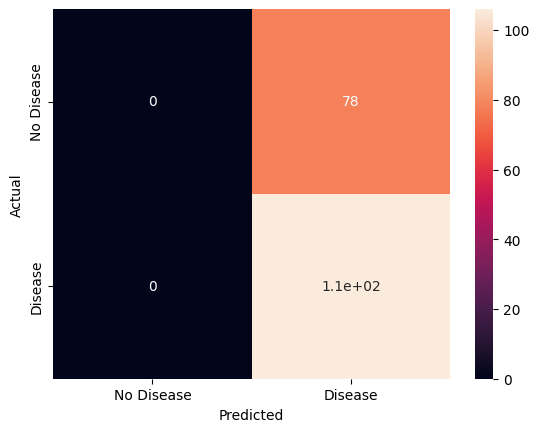

In [26]:
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True,
xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


#### Random Forest result

`max_depth = 3.0` and `min_samples_leaf = 100` -> seem to get the best performance and the scores are better than Logitic Regression

Though these parameter didn't get `recall = 1.00` but it got high score in both reall and AUC. Moreover, the parameters that achieve `recall = 1.00` got `auc = 0.5` from the confusion matrix and classification report show that it predicted everything as label 1. So I didn't pick these model

### XGBoost

In [27]:
scores = []
for eta in [0.001, 0.01, 0.1, 0,5, 1]:
    for max_depth in [3, 5, 10, 15, 20, 50]:
        for min_child_weight in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
            xgb = XGBClassifier(min_child_weight=min_child_weight,max_depth=max_depth, eta=eta, seed=42)
            xgb.fit(X_train, y_train)
            y_pred = xgb.predict(X_val)
            y_pred_proba = xgb.predict_proba(X_val)[:,1]
            auc = roc_auc_score(y_val, y_pred_proba)
            recall = recall_score(y_val, y_pred)
            scores.append((eta, max_depth, min_child_weight, auc, recall))


In [28]:
xgb_score_df = pd.DataFrame(scores, columns=['eta', 'max_depth', 'min_child_weight', 'AUC', 'Recall'])
xgb_score_df.sort_values(['Recall','AUC'], ascending=False)

,eta,max_depth,min_child_weight,AUC,Recall
12,0.001,5,10,0.949565,1.0
21,0.001,10,10,0.949565,1.0
30,0.001,15,10,0.949565,1.0
39,0.001,20,10,0.949565,1.0
48,0.001,50,10,0.949565,1.0
...,...,...,...,...,...
248,5.000,15,20,0.919872,0.0
256,5.000,20,15,0.919872,0.0
257,5.000,20,20,0.919872,0.0
265,5.000,50,15,0.919872,0.0


In [29]:
xgb = XGBClassifier(min_child_weight=10,max_depth=5, eta=0.001, seed=42)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)

result = classification_report(y_val, y_pred)
print(result)

              precision    recall  f1-score   support

           0       1.00      0.46      0.63        78
           1       0.72      1.00      0.83       106

    accuracy                           0.77       184
   macro avg       0.86      0.73      0.73       184
weighted avg       0.84      0.77      0.75       184



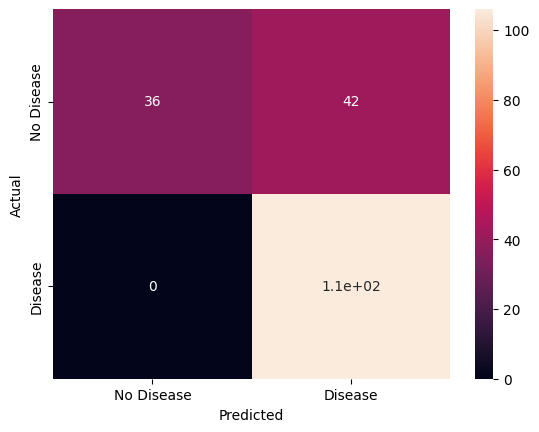

In [30]:
cm = confusion_matrix(y_val, y_pred)

sns.heatmap(cm, annot=True,
xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

#### XGBoost result

`max_depth = 5`, `eta = 0.001` and `min_child_weight = 10` -> seem to get the best performance for XGBoost and XGBoost seem to perform best for this dataset so I will use XGBoost for further process